### Technical

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
import pickle # for load and save model
import warnings
warnings.filterwarnings('ignore')

### EDA

In [5]:
# importing dataset
data = pd.read_csv('data/diabetes.csv')
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


- Polyuria - полиурия (увеличенное образование мочи)
- Polydipsia - полидипсия (неутолимая жажда)
- sudden weight loss - внезапная потеря веса
- weakness - слабость
- Polyphagia - полифагия (повышенный аппетит)
- Genital thrush - генитальная молочница
- visual blurring - расплывчатость зрения
- Itching - зуд
- Irritability - раздражительность
- delayed healing - медленное заживление ран
- partial paresis - частичный парез (потеря мышечной силы)
- muscle stiffness - жесткость мышц
- Alopecia - алопеция (выпадение волос)
- Obesity - ожирение

In [6]:
data.drop_duplicates(inplace=True)

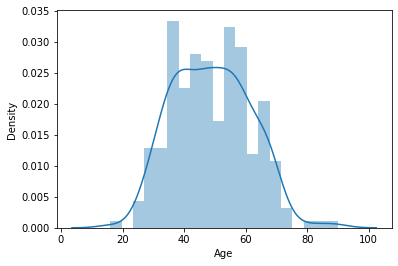

In [7]:
sns_plot = sns.distplot(data['Age'], bins=20)
fig = sns_plot.get_figure()

In [8]:
data.rename(str.lower, axis='columns', inplace=True)
print(data.columns.to_list())

['age', 'gender', 'polyuria', 'polydipsia', 'sudden weight loss', 'weakness', 'polyphagia', 'genital thrush', 'visual blurring', 'itching', 'irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'alopecia', 'obesity', 'class']


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 251 non-null    int64 
 1   gender              251 non-null    object
 2   polyuria            251 non-null    object
 3   polydipsia          251 non-null    object
 4   sudden weight loss  251 non-null    object
 5   weakness            251 non-null    object
 6   polyphagia          251 non-null    object
 7   genital thrush      251 non-null    object
 8   visual blurring     251 non-null    object
 9   itching             251 non-null    object
 10  irritability        251 non-null    object
 11  delayed healing     251 non-null    object
 12  partial paresis     251 non-null    object
 13  muscle stiffness    251 non-null    object
 14  alopecia            251 non-null    object
 15  obesity             251 non-null    object
 16  class               251 no

In [12]:
# data processing
df_diabetes = data.replace(["Yes", 'No', 'Male', 'Female', 'Positive', 'Negative'], [1, 0, 1, 0, 1, 0])

df_diabetes.columns = (['age', 'gender',  'polyuria',  'polydipsia', 'sudden_weight_loss',
                                                             'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
                                                             'itching', 'irritability', 'delayed_healing', 'partial_paresis',
                                                             'muscle_stiffness', 'alopecia', 'obesity','class'])
df_diabetes

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [14]:
df_diabetes.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,48.864542,0.637450,0.525896,0.494024,0.414343,0.633466,0.466135,0.266932,0.442231,0.505976,0.282869,0.498008,0.446215,0.390438,0.358566,0.175299,0.689243
std,12.526036,0.481697,0.500327,0.500963,0.493592,0.482820,0.499849,0.443241,0.497644,0.500963,0.451293,0.500995,0.498092,0.488823,0.480538,0.380982,0.463728
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
print(df_diabetes.columns.to_list())

['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


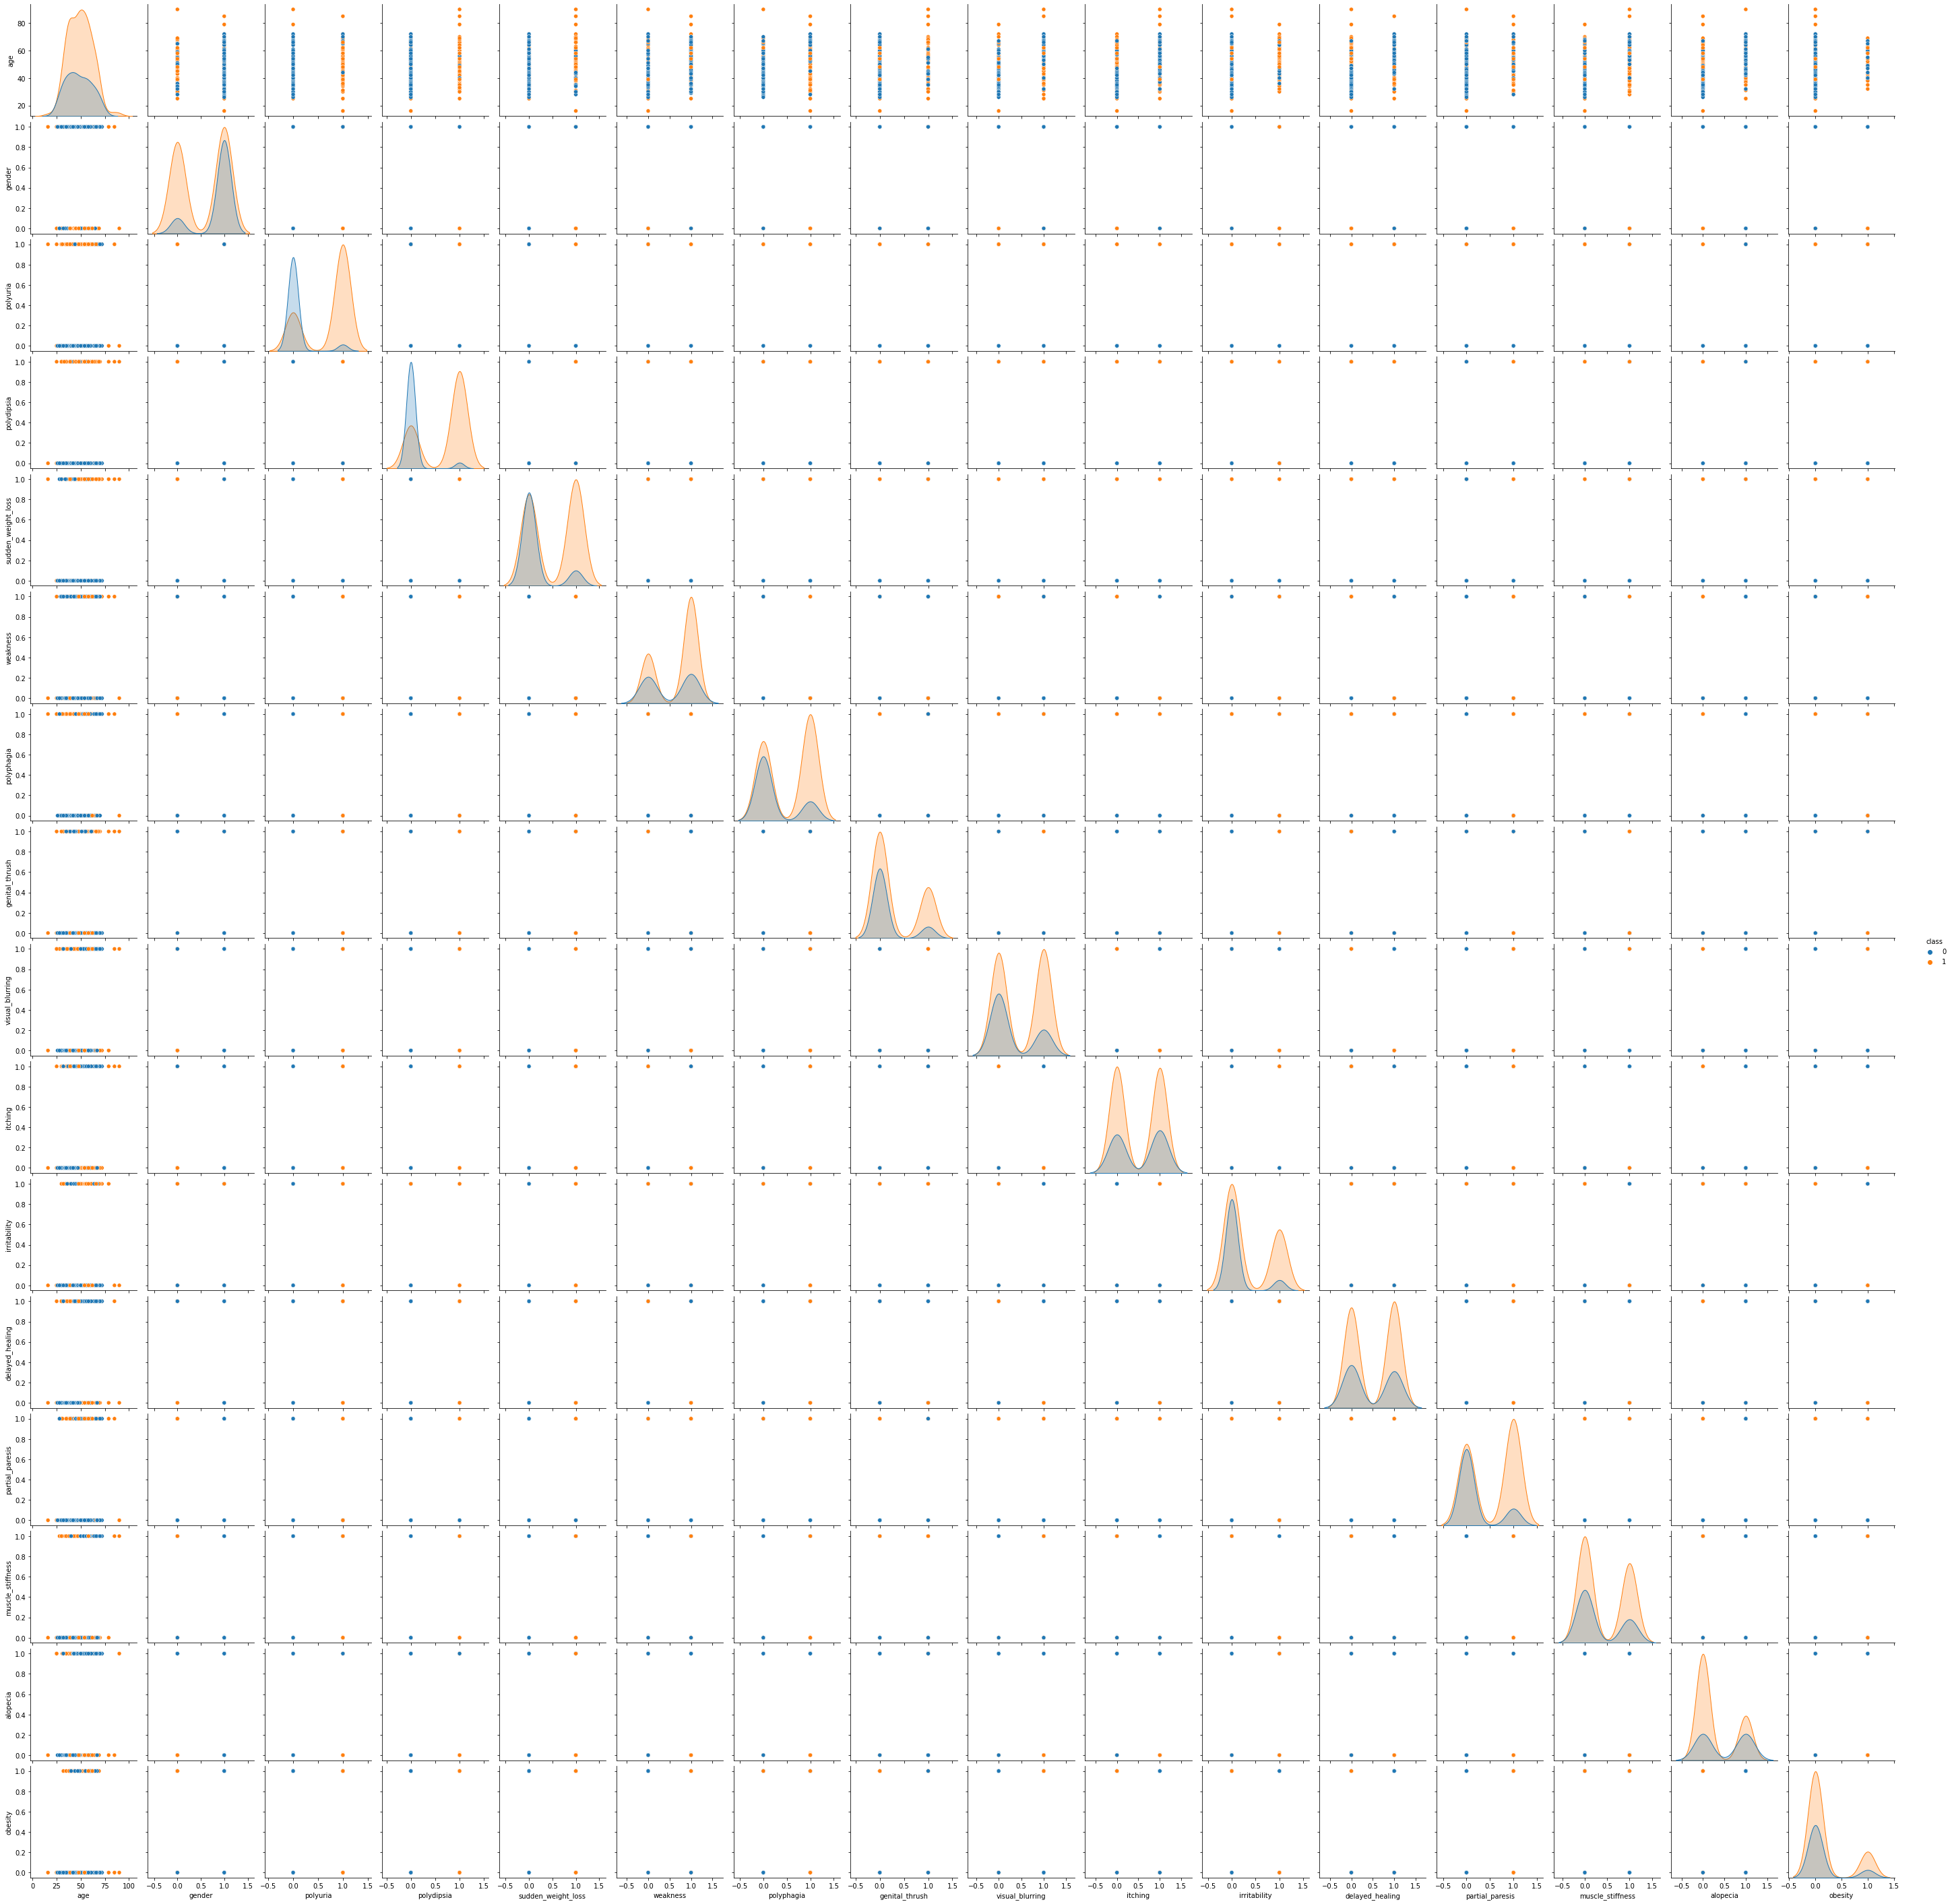

In [16]:
sns.pairplot(df_diabetes, hue='class')

<AxesSubplot:>

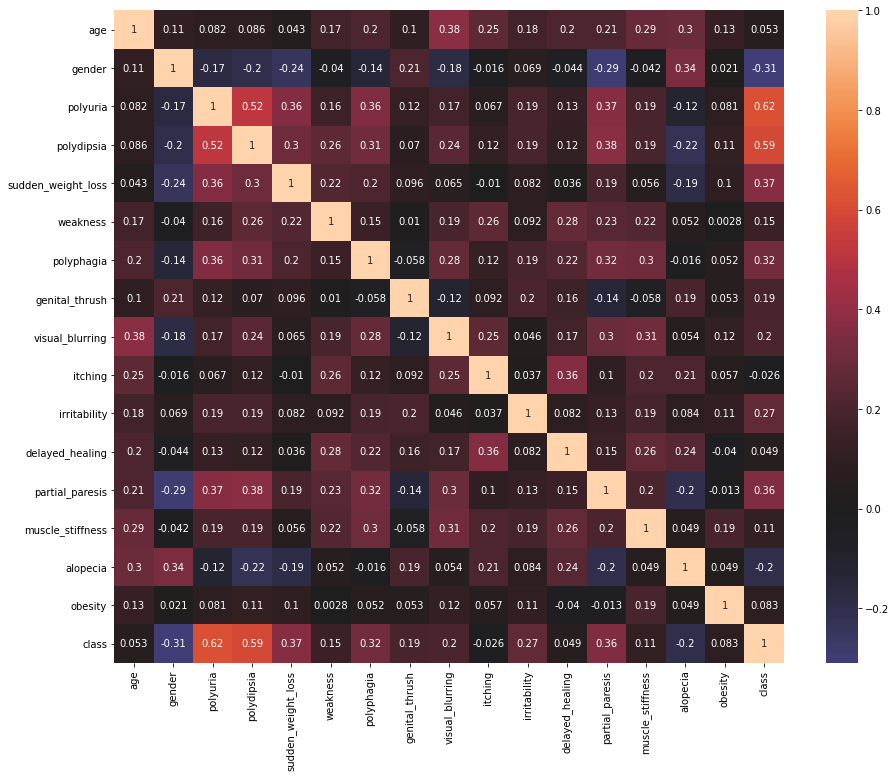

In [17]:
fig, ax = plt.subplots(figsize=(15,12))   
sns.heatmap(df_diabetes.corr(method='pearson'), center=0, square=False, annot=True, ax=ax)

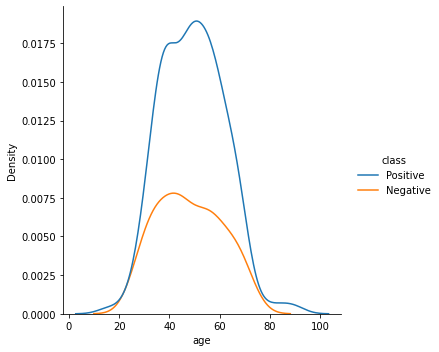

In [18]:
sns.displot(data=data, x='age', hue='class', kind='kde');

In [19]:
from scipy.stats import pointbiserialr
pointbiserialr(df_diabetes.iloc[:, 1], df_diabetes.age)

PointbiserialrResult(correlation=0.10916809206933127, pvalue=0.0843335297777791)

#### Основные выводы

* Перечисленные в исходных данных признаки (полиурия, полидипсия, внезапная потеря веса, слабость, поышенный аппетит, ожирание, зуд и т.п.) являются симптомами сахарного диабета.  Стоит отметить, что чем выше стадия сахарного диабета, тем заметнее проявление симптомов. 

* Указан признак полиурия, но помимо этого возможно также ночное недержание. Можно добавить и такие признаки, как онемение и покалывание в руках и ногах, повышеная потливость, быстрая утомляемость, нехватка энергии, сильная усталость и сухость во рту из-за чувства жажды.

* На представленных данных можно построить модель. В будущем в данные можно будет добавить указанные выше симптомы, а также расширить географию сбора данных.

* Признаки не противоречат друг другу, данные соответствуют гипотезе.

* Диабет, особенно 2-го типа, наиболее распространен среди мужчин, чем среди женщин. https://www.news-medical.net/health/Diabetes-in-Men-versus-Women.aspx

* Целевой класс сильно коррелирует с переменными полиурия и полидипсия.  https://www.jdrf.org/t1d-resources/about/symptoms/frequent-urination/

* Также целевой класс коррелирует с внезапной потерей веса. https://www.medicinenet.com/is_weight_loss_caused_by_diabetes_dangerous/ask.htm

### Modelling

In [20]:
rdm_state = 42
param_grid = {
    'n_estimators': np.arange(5, 51, 15),
    'max_depth': np.arange(5, 51, 15),
    'min_samples_split': np.arange(2, 11, 4),
    'min_samples_leaf': np.arange(1, 10, 4),
    'max_samples': np.arange(0.1, 0.99, 0.23), 
}
cv = 3

In [21]:
X = df_diabetes.drop('class', 1)
y = df_diabetes['class']

In [22]:
(X_train, 
 X_test, 
 y_train, y_test) = train_test_split(X, y, 
                                     test_size=0.25, 
                                     random_state=rdm_state, shuffle=True)

#### Random forest

In [23]:
%%time
model_RFC = RandomForestClassifier(n_jobs=-1, random_state=rdm_state)
clf = GridSearchCV(model_RFC, param_grid, cv=cv)
clf.fit(X_train, y_train)
clf.best_params_

CPU times: user 2min 11s, sys: 12.1 s, total: 2min 23s
Wall time: 2min 12s


{'max_depth': 20,
 'max_samples': 0.56,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 35}

In [24]:
y_pred_RFC = clf.predict(X_test)

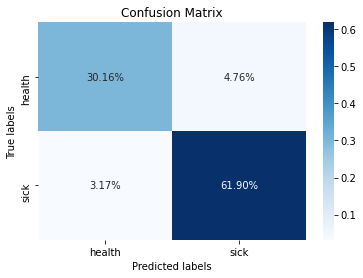

In [25]:
conf_mat = confusion_matrix(y_test, y_pred_RFC)

ax = plt.subplot()
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['health', 'sick']); ax.yaxis.set_ticklabels(['health', 'sick']);

In [26]:
print(f'f1 score - {round(100 * f1_score(y_test, y_pred_RFC), 2)}%,\nrecall score - {round(100* recall_score(y_test, y_pred_RFC), 2)}%')

f1 score - 93.98%,
recall score - 95.12%


#### Вывод
- Решая поставленную задачу, мы испробовали многие методы машинного обучения, такие как логистическая регрессия, SVM, random forest и так далее. Лучший результат на наших данных показал случайный лес по метрике f1 score. 

### Save model

In [27]:
clf

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': array([ 5, 20, 35, 50]),
                         'max_samples': array([0.1 , 0.33, 0.56, 0.79]),
                         'min_samples_leaf': array([1, 5, 9]),
                         'min_samples_split': array([ 2,  6, 10]),
                         'n_estimators': array([ 5, 20, 35, 50])})

In [28]:
# Save to file in the current working directory
pkl_filename = "random_forest_diabet.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

### Load model

In [29]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 92.06 %


In [30]:
y_pred_RFC = pickle_model.predict(X_test)